In [70]:
import matplotlib.pyplot as plt 
from matplotlib import cm 
import pickle 
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

plt.style.use('seaborn-whitegrid')
f = pd.read_csv('results5.csv')
%matplotlib inline

In [71]:
temp_f = f.drop_duplicates(subset='n_ap', keep='last')
new_f = temp_f.sort_values(by = 'n_ap')

## Fitting with sigmoidal function

In [72]:
def sigmoid(x, L ,x0, k, b):
    y = -L / (1 + np.exp(-k*(x-x0)))+b
    return y

p0 = [max(new_f["ratio"]), np.median(new_f["n_ap"]), 1, min(new_f["ratio"])] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, new_f["n_ap"], new_f["ratio"], p0, method='dogbox')

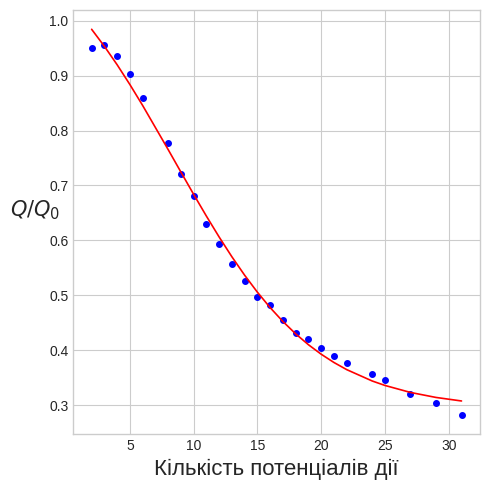

In [73]:
plt.figure(dpi=100, figsize=(5, 5))
plt.plot(new_f["n_ap"], new_f["ratio"], "bo", markersize=4)
plt.plot(new_f["n_ap"], sigmoid( new_f["n_ap"], *popt), 'r-', lw=1.2)

plt.xlabel("Кількість потенціалів дії", fontsize=16)
plt.ylabel("$Q/Q_0$", fontsize=15, labelpad=10).set_rotation(0)
plt.tight_layout()
#plt.savefig('../../Diplom/images/n_ap_charge.png')
plt.show()